## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej ($y$) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('datasets/Salary.csv', sep=',')
X = np.array(df.iloc[:, 0:2].values)

print(X)

y = np.array(df['Salary'].values.reshape(df['Salary'].shape[0], 1))[:, 0]

print(y)


[[1.10000e+00 3.93430e+04]
 [1.30000e+00 4.62050e+04]
 [1.50000e+00 3.77310e+04]
 [2.00000e+00 4.35250e+04]
 [2.20000e+00 3.98910e+04]
 [2.90000e+00 5.66420e+04]
 [3.00000e+00 6.01500e+04]
 [3.20000e+00 5.44450e+04]
 [3.20000e+00 6.44450e+04]
 [3.70000e+00 5.71890e+04]
 [3.90000e+00 6.32180e+04]
 [4.00000e+00 5.57940e+04]
 [4.00000e+00 5.69570e+04]
 [4.10000e+00 5.70810e+04]
 [4.50000e+00 6.11110e+04]
 [4.90000e+00 6.79380e+04]
 [5.10000e+00 6.60290e+04]
 [5.30000e+00 8.30880e+04]
 [5.90000e+00 8.13630e+04]
 [6.00000e+00 9.39400e+04]
 [6.80000e+00 9.17380e+04]
 [7.10000e+00 9.82730e+04]
 [7.90000e+00 1.01302e+05]
 [8.20000e+00 1.13812e+05]
 [8.70000e+00 1.09431e+05]
 [9.00000e+00 1.05582e+05]
 [9.50000e+00 1.16969e+05]
 [9.60000e+00 1.12635e+05]
 [1.03000e+01 1.22391e+05]
 [1.05000e+01 1.21872e+05]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 11

Text(0.5, 0, 'Salary')

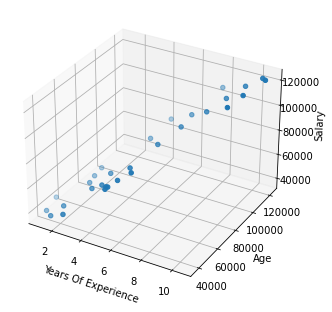

In [29]:
f = plt.figure()
axes = Axes3D(f)
axes.scatter(X[:, 0], X[:, 1], y)

axes.set_xlabel('Years Of Experience')
axes.set_ylabel('Age')
axes.set_zlabel('Salary')

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

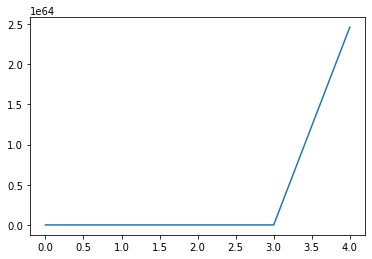

In [30]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
import random


epoch_max = 5

def fx(b_0, b_1, b_2, x):
    return b_0 + b_1*x[:, 0] + b_2*x[:, 1]


def learn_and_fit(X, y):
    # YOUR CODE HERE
    b0 = []
    betas = []
    error = []
    
    m = len(y)
    alpha = 0.002
    beta_0 = random.random()
    beta_1 = random.random()
    beta_2 = random.random()

    for e in range(epoch_max):
        flr = fx(beta_0, beta_1, beta_2,X)
        SSR = (1/(2*m)) * sum((flr - y)**2)
        
        b0.append(beta_0)
        betas.append([beta_1, beta_2])
        error.append(SSR)
        
        poch_cz_beta_0 = 1/m * sum(flr-y)
        poch_cz_beta_1 = 1/m * sum((flr-y) * X[:, 0])
        poch_cz_beta_2 = 1/m * sum((flr-y) * X[:, 1])
        
        beta_0 = beta_0 - (alpha * poch_cz_beta_0)
        beta_1 = beta_1 - (alpha * poch_cz_beta_1)
        beta_2 = beta_2 - (alpha * poch_cz_beta_2)
    
    
    return b0, betas, error

b0, betas, error = learn_and_fit(X, y)
plt.plot(error)
plt.show()


# for a in (0.001, 0.002, 0.003, 0.005):
#     b0, betas, error = learn_and_fit(X, y, a)
#     plt.plot(error)
#     plt.show()

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

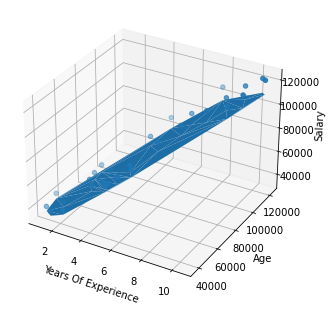

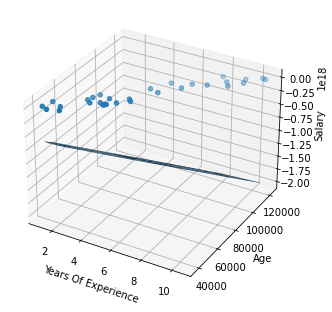

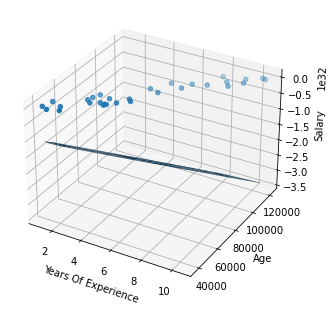

In [31]:
f1 = plt.figure()
axes1 = Axes3D(f1)
axes1.scatter(X[:, 0], X[:, 1], y)
axes1.set_xlabel('Years Of Experience')
axes1.set_ylabel('Age')
axes1.set_zlabel('Salary')

flr = fx(b0[0], betas[0][0], betas[0][1], X)
axes1.plot_trisurf(X[:, 0], X[:, 1], flr)

f2 = plt.figure()
axes2 = Axes3D(f2)
axes2.scatter(X[:, 0], X[:, 1], y)
axes2.set_xlabel('Years Of Experience')
axes2.set_ylabel('Age')
axes2.set_zlabel('Salary')

flr = fx(b0[2], betas[2][0], betas[2][1], X)
axes2.plot_trisurf(X[:, 0], X[:, 1], flr)

f3 = plt.figure()
axes3 = Axes3D(f3)
axes3.scatter(X[:, 0], X[:, 1], y)
axes3.set_xlabel('Years Of Experience')
axes3.set_ylabel('Age')
axes3.set_zlabel('Salary')

flr = fx(b0[4], betas[4][0], betas[4][1], X)
axes3.plot_trisurf(X[:, 0], X[:, 1], flr)


### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [32]:
df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
X = np.array(df.iloc[:, 0:5].values)

# print(X)

y = np.array(df['y'].values.reshape(df['y'].shape[0], 1))[:, 0]

# print(y)

def fx(beta_0, betas, X):
    sum =  beta_0
    ln = len(X[0])
    
    for i in range(ln):
        sum = sum + betas[i] * X[:, i]
    return sum




epoch_max = 500

def learn_and_fit_multi(X, y):

    b0 = []
    betas = []
    error = []
    
    m = len(y)
    alpha = 0.02
    
    
    number_of_features = X.shape[1];
    
    beta_0 = random.random()
    features = []
    
    for i in range(number_of_features):
        features.append(random.random())
    
    
    
    for e in range(epoch_max):
        
        flr = fx(beta_0, features, X)
        SSR = (1/(2*m)) * sum((flr-y)**2)
        
        b0.append(beta_0)
        betas.append(features)
        error.append(SSR)
        
        
        beta_0 -= alpha * ((1/m) * sum(flr-y))
        
        for i in range(number_of_features):
            features[i] -= alpha * (1/m) * sum((flr-y)* X[:, i])
    
    return b0, betas, error      


b0, betas, error = learn_and_fit_multi(X, y)

# plt.plot(error)
# plt.show()

### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

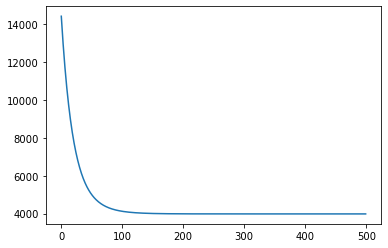

In [33]:
plt.plot(error)
plt.show()


można zauważyć ile epok jest potrzebnych do uzyskania wystarczająco małej wartości błędu. widać również, że wartość błędu spada najszybciej na samym początku, póżniej zdecydowanie wolniej.